# Preparing the Iris Dataset

## Dataset Overview:
- **Numerical Variables**:
  - Sepal Length
  - Sepal Width
  - Petal Length
  - Petal Width
  
- **Categorical Variable**:
  - Species (Setosa, Versicolor, Virginica)

## Source:
- Load directly from Python's `sklearn` library.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris



iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].replace({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})


# Iris Dataset Details

The Iris dataset is a famous dataset in machine learning, often used for classification tasks. It contains data on 150 iris flowers, each belonging to one of three species: Setosa, Versicolor, or Virginica.

### Dataset Overview:
- **Number of Samples**: 150
- **Number of Features**: 4
- **Target Variable**: Species (Categorical)
  - Setosa (0)
  - Versicolor (1)
  - Virginica (2)



# Task 1: Z-Test

## Objective:
Compare the means of a numerical variable between two groups of a categorical variable.

- **Null Hypothesis (𝐻₀)**: The means of the two groups are equal.
- **Alternative Hypothesis (𝐻ₐ)**: The means of the two groups are not equal.

## Steps:

1. **Split the dataset** based on the categorical variable (Species) into two groups (e.g., Setosa vs. Versicolor).

2. **Use the formula for the Z statistic**:

   $$
   Z = \frac{ \bar{X}_1 - \bar{X}_2 }{ \sqrt{ \frac{\sigma^2}{n_1} + \frac{\sigma^2}{n_2} } }
   $$

   Where:
   -$$
\bar{X}_1, \, \bar{X}_2 \, \text{are the sample means of the two groups.}
$$

$$
\sigma \, \text{is the population standard deviation.}
$$

$$
n_1, \, n_2 \, \text{are the sample sizes of the two groups.}
$$


3. **Compute the p-value** and compare it with 0.05 to determine the statistical significance.

## Deliverable:
- Z statistic
- p-value
- Interpretation: If the p-value is less than 0.05, reject the null hypothesis and conclude that there is a significant difference in the means of the two groups.


Z-statistic: -39.49271939153809
P-value: 0.0
Reject the null hypothesis: The average petal lengths of Setosa and Versicolor are different.


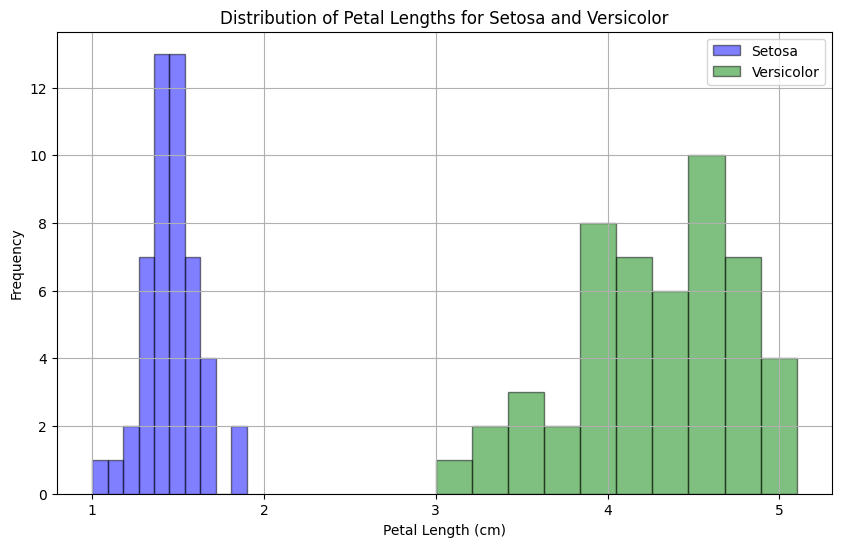

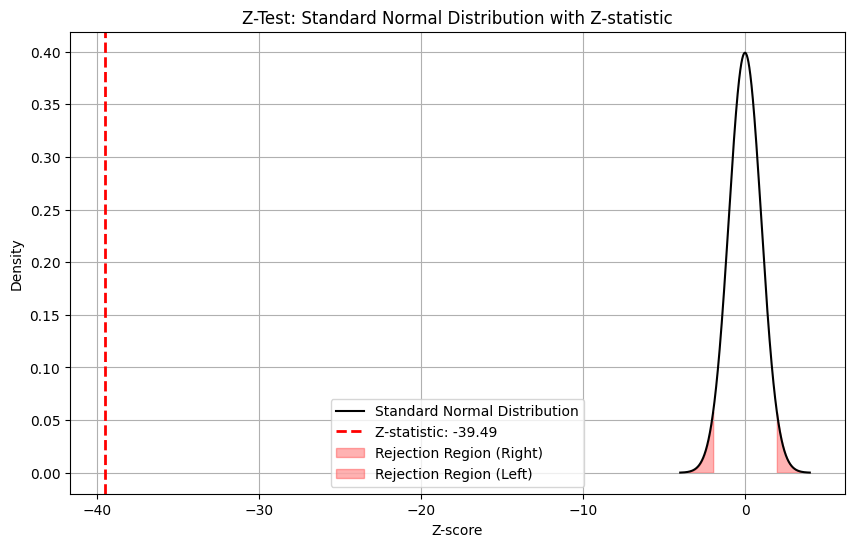

In [6]:
# Filter data for Setosa and Versicolor species
setosa = data[data['species'] == 'Setosa']['petal length (cm)']
versicolor = data[data['species'] == 'Versicolor']['petal length (cm)']

# Calculate the sample means and population standard deviation
mean_setosa = setosa.mean()
mean_versicolor = versicolor.mean()

# Assume a population standard deviation or calculate sample standard deviation
# Here we assume that the population standard deviation is the same for both groups (a common assumption in Z-test)
std_setosa = setosa.std()
std_versicolor = versicolor.std()

# Population size for Setosa and Versicolor
n_setosa = len(setosa)
n_versicolor = len(versicolor)

# Z-test formula (assuming equal population standard deviation)
# Z = (mean1 - mean2) / sqrt((std^2 / n1) + (std^2 / n2))

# Use the pooled standard deviation for Z-test
pooled_std = np.sqrt(((std_setosa ** 2) / n_setosa) + ((std_versicolor ** 2) / n_versicolor))

# Z-statistic
z_statistic = (mean_setosa - mean_versicolor) / pooled_std

# Calculate the p-value using Z-distribution (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

# Output the results
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average petal lengths of Setosa and Versicolor are different.")
else:
    print("Fail to reject the null hypothesis: The average petal lengths of Setosa and Versicolor are not significantly different.")

# Visualization

# Plot histograms of petal lengths for Setosa and Versicolor
plt.figure(figsize=(10, 6))
plt.hist(setosa, bins=10, alpha=0.5, label='Setosa', color='blue', edgecolor='black')
plt.hist(versicolor, bins=10, alpha=0.5, label='Versicolor', color='green', edgecolor='black')
plt.title('Distribution of Petal Lengths for Setosa and Versicolor')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Z-Test visualization
# Create a range of values for plotting the standard normal distribution
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

# Plot the standard normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='black')

# Mark the Z-statistic on the curve
plt.axvline(z_statistic, color='red', linestyle='dashed', linewidth=2, label=f'Z-statistic: {z_statistic:.2f}')

# Mark the critical region (p-value = 0.05 for a two-tailed test)
plt.fill_between(x, y, where=(x > 1.96), color='red', alpha=0.3, label='Rejection Region (Right)')
plt.fill_between(x, y, where=(x < -1.96), color='red', alpha=0.3, label='Rejection Region (Left)')

plt.title('Z-Test: Standard Normal Distribution with Z-statistic')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# Task 2: T-Test

## Objective:
Perform a two-sample t-test to compare means where the population standard deviation is unknown.

- **Null Hypothesis (𝐻₀)**: The means of the two groups are equal.
- **Alternative Hypothesis (𝐻ₐ)**: The means of the two groups are not equal.

## Steps:

1. **Split the dataset** into two groups based on a categorical variable.

2. **Use the formula for the T statistic**:

   $$
   t = \frac{ \bar{X}_1 - \bar{X}_2 }{ \sqrt{ \frac{S_1^2}{n_1} + \frac{S_2^2}{n_2} } }
   $$

   Where:
   $$
S_1, S_2 \, \text{are the sample standard deviations of the two groups.}
$$

$$
\bar{X}_1, \, \bar{X}_2 \, \text{are the sample means of the two groups.}
$$

$$
n_1, \, n_2 \, \text{are the sample sizes of the two groups.}
$$


3. **Compute the p-value** and compare it with 0.05 to determine the statistical significance.

## Deliverable:
- T statistic
- p-value
- Interpretation: If the p-value is less than 0.05, reject the null hypothesis and conclude that there is a significant difference in the means of the two groups.


T-statistic: -39.492719391538095
P-value: 9.934432957587695e-46
Reject the null hypothesis: The average petal lengths of Setosa and Versicolor are different.


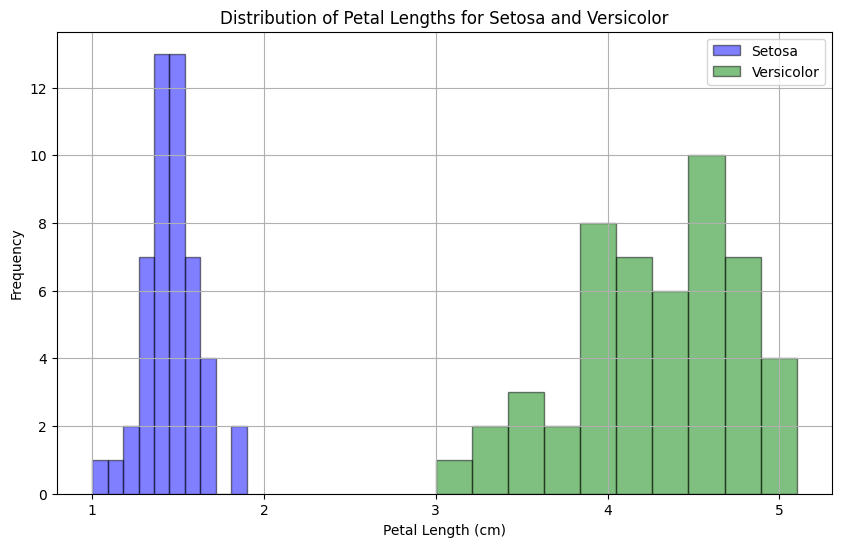

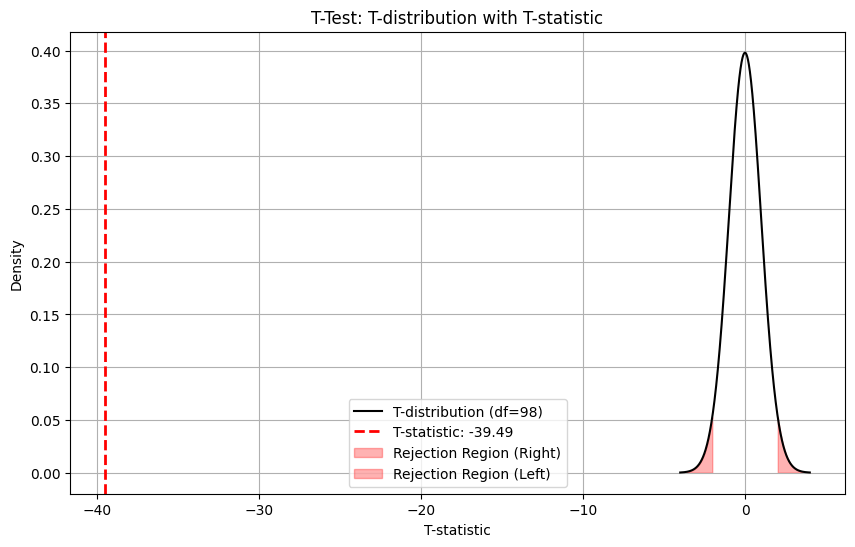

In [7]:
# Filter data for Setosa and Versicolor species
setosa = data[data['species'] == 'Setosa']['petal length (cm)']
versicolor = data[data['species'] == 'Versicolor']['petal length (cm)']

# Perform the T-test (Two-sample, assuming unequal variances)
t_statistic, p_value = stats.ttest_ind(setosa, versicolor, equal_var=False)

# Output the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average petal lengths of Setosa and Versicolor are different.")
else:
    print("Fail to reject the null hypothesis: The average petal lengths of Setosa and Versicolor are not significantly different.")

# Visualization

# Plot histograms of petal lengths for Setosa and Versicolor
plt.figure(figsize=(10, 6))
plt.hist(setosa, bins=10, alpha=0.5, label='Setosa', color='blue', edgecolor='black')
plt.hist(versicolor, bins=10, alpha=0.5, label='Versicolor', color='green', edgecolor='black')
plt.title('Distribution of Petal Lengths for Setosa and Versicolor')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# T-Test visualization
# Create a range of values for plotting the t-distribution
df = len(setosa) + len(versicolor) - 2  # degrees of freedom for the T-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"T-distribution (df={df})", color='black')

# Mark the T-statistic on the curve
plt.axvline(t_statistic, color='red', linestyle='dashed', linewidth=2, label=f'T-statistic: {t_statistic:.2f}')

# Mark the critical regions (p-value = 0.05 for a two-tailed test)
plt.fill_between(x, y, where=(x > 2.02), color='red', alpha=0.3, label='Rejection Region (Right)')
plt.fill_between(x, y, where=(x < -2.02), color='red', alpha=0.3, label='Rejection Region (Left)')

plt.title('T-Test: T-distribution with T-statistic')
plt.xlabel('T-statistic')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# Task 3: Chi-Square Test

## Objective:
Determine if there is a significant association between two categorical variables.

- **Null Hypothesis (𝐻₀)**: The two categorical variables are independent.
- **Alternative Hypothesis (𝐻ₐ)**: The two categorical variables are not independent.

## Steps:

1. **Create a contingency table** of observed frequencies.

2. **Calculate expected frequencies** using the formula:

   $$
   E_{ij} = \frac{( \text{Row Total}_i \times \text{Column Total}_j )}{\text{Grand Total}}
   $$

3. **Compute the Chi-square statistic**:

   $$
   \chi^2 = \sum \frac{( O_{ij} - E_{ij} )^2}{E_{ij}}
   $$

4. **Compare the p-value** with 0.05 to determine statistical significance.

## Deliverable:
- Observed and expected frequency tables
- Chi-square statistic
- p-value
- Interpretation: If the p-value is less than 0.05, reject the null hypothesis and conclude that there is a significant association between the two categorical variables.


Contingency Table:
petal_width_category  High  Low
species                        
Setosa                   0   50
Versicolor              22   28
Virginica               50    0
Chi-square Statistic: 100.64102564102564
P-value: 1.399841793168713e-22
Degrees of Freedom: 2
Expected Frequencies:
[[24. 26.]
 [24. 26.]
 [24. 26.]]
Reject the null hypothesis: There is a significant association between species and petal width category.


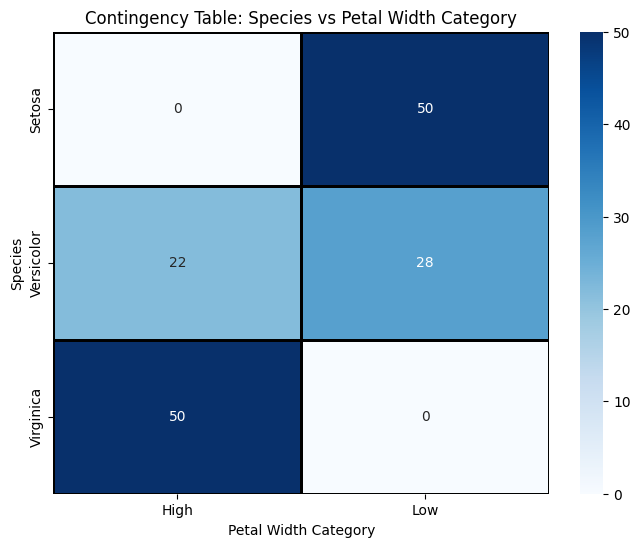

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].replace({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Convert 'petal width (cm)' into a categorical variable (Low, High)
median_petal_width = data['petal width (cm)'].median()
data['petal_width_category'] = data['petal width (cm)'].apply(lambda x: 'High' if x > median_petal_width else 'Low')

# Create a contingency table
contingency_table = pd.crosstab(data['species'], data['petal_width_category'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between species and petal width category.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between species and petal width category.")

# Visualization

# Plot the contingency table as a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', linewidths=1, linecolor='black')
plt.title('Contingency Table: Species vs Petal Width Category')
plt.xlabel('Petal Width Category')
plt.ylabel('Species')
plt.show()


# Z-Test vs T-Test: Key Differences and Analysis

Both the **Z-Test** and **T-Test** are used to compare means, but they differ in their assumptions and application scenarios. Here's a breakdown of each test and how they compare:

---

## 1. Assumptions and Use Cases
- **Z-Test**:
  - **Population Standard Deviation Known**: The Z-test is typically used when the population's standard deviation is known or when the sample size is large (n > 30). In these cases, the sample standard deviation is a good approximation of the population standard deviation.
  - **Large Sample Size**: For large sample sizes (typically n > 30), the Central Limit Theorem ensures that the sampling distribution of the sample mean is approximately normal, making the Z-test appropriate.
  - **Normal Distribution**: The data should follow a normal distribution, especially for smaller sample sizes.

- **T-Test**:
  - **Population Standard Deviation Unknown**: The T-test is used when the population's standard deviation is unknown, which is often the case in real-world scenarios. Instead, the sample standard deviation is used to estimate the population standard deviation.
  - **Small Sample Size**: The T-test is commonly used for smaller sample sizes (n < 30), where the sampling distribution of the sample mean is not necessarily normal. The T-distribution accounts for the increased variability in small samples.
  - **Normal Distribution Assumption**: Similar to the Z-test, the data should ideally follow a normal distribution. However, the T-test is more robust to violations of normality when the sample size is small.

---

## 2. Test Statistics
- **Z-Test**:
  - The test statistic for the Z-test is given by:

  $$
  Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}
  $$

  Where:
  $$
  \bar{X} \text{ is the sample mean,}
  $$
  $$
  \mu \text{ is the population mean,}
  $$
  $$
  \sigma \text{ is the population standard deviation,}
  $$
  $$
  n \text{ is the sample size.}
  $$

  - Z-tests assume that the population standard deviation (\( \sigma \)) is known.

- **T-Test**:
  - The test statistic for the T-test is given by:

  $$
  T = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}
  $$

  Where:
  $$
  \bar{X} \text{ is the sample mean,}
  $$
  $$
  \mu \text{ is the population mean,}
  $$
  $$
  s \text{ is the sample standard deviation,}
  $$
  $$
  n \text{ is the sample size.}
  $$

  - The T-test uses the sample standard deviation (\( s \)) since the population standard deviation (\( \sigma \)) is unknown.

---

## 3. Distribution
- **Z-Test**:
  - The Z-test statistic follows a **normal distribution** (also called the standard normal distribution) with a mean of 0 and a standard deviation of 1.
  
- **T-Test**:
  - The T-test statistic follows a **T-distribution**, which is similar to the normal distribution but with heavier tails. The shape of the T-distribution depends on the sample size (degrees of freedom, \( df = n - 1 \)).
  - As the sample size increases, the T-distribution approaches the normal distribution. For large samples, the T-test and Z-test will yield nearly identical results.

---

## 4. Critical Values
- **Z-Test**:
  - The critical values for the Z-test are determined by the **normal distribution**. For a significance level (\( \alpha = 0.05 \)) in a two-tailed test, the critical Z-values are approximately \( \pm 1.96 \).

- **T-Test**:
  - The critical values for the T-test are determined by the **T-distribution**, which depends on the sample size (degrees of freedom). For small sample sizes, the T-distribution has more spread (heavier tails) compared to the normal distribution.

---

## 5. Hypothesis Testing
Both tests are used to test hypotheses, specifically comparing the sample mean to a population mean.

- **Z-Test**: Often used when the population standard deviation is known or the sample size is large enough to approximate it. Commonly used for large datasets.
- **T-Test**: Used when the population standard deviation is unknown and the sample size is small. The T-distribution compensates for the uncertainty introduced by estimating the population standard deviation.

---

## 6. When to Use Each Test?
- **Z-Test**:
  - Use the Z-test when:
    - The sample size is large (n > 30).
    - The population standard deviation is known (or the sample size is large enough that the sample standard deviation approximates the population standard deviation).
    - The data follows a normal distribution.
  
- **T-Test**:
  - Use the T-test when:
    - The sample size is small (n < 30).
    - The population standard deviation is unknown.
    - The data follows a normal distribution (especially important with small sample sizes).
    - If the sample size is large, a Z-test may be used, but T-test can still be used as an alternative.

---

## Key Comparison Table

| Feature                        | **Z-Test**                             | **T-Test**                             |
|---------------------------------|----------------------------------------|----------------------------------------|
| **Population Standard Deviation**| Known or large sample size            | Unknown                                |
| **Sample Size**                 | Large (n > 30)                         | Small (n < 30)                         |
| **Distribution**                | Normal (standard normal distribution)  | T-distribution (depends on sample size)|
| **Test Statistic**              | \( \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} \) | \( \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}} \) |
| **Critical Value**              | From normal distribution              | From T-distribution with degrees of freedom |
| **When to Use**                 | Large samples, known population SD    | Small samples, unknown population SD  |
| **Example**                     | Testing average exam scores of a large class | Testing average income between two small groups |

---

## Conclusion
- **Z-Test** is more powerful when the population standard deviation is known, especially with large sample sizes.
- **T-Test** is more flexible, as it can be used with smaller sample sizes and when the population standard deviation is unknown.
- As the sample size grows, the T-test approaches the Z-test because the sample standard deviation becomes a more accurate estimate of the population standard deviation.

Let me know if you need further clarifications or additional examples!


### Numerical vs. Categorical Variable Analysis

In statistical hypothesis testing, the approach differs based on the type of data you're dealing with—**numerical (quantitative)** variables and **categorical (qualitative)** variables. The distinction between these two types of variables shapes the choice of statistical tests used to analyze the data.

#### **Numerical Variables**:
Numerical variables represent measurable quantities that can take on a wide range of values. These values are continuous and can be subjected to various mathematical operations, such as addition, subtraction, multiplication, and division. Examples include **height**, **weight**, **salary**, **temperature**, etc.

- **Key Focus**: When analyzing numerical variables, the primary goal is often to compare or determine differences in **means** or **averages** across groups.
  
- **Analysis**: Z-tests and T-tests are typically used to test hypotheses related to the means of numerical variables. Both tests aim to determine if there is a significant difference between the means of two or more groups.

#### **Categorical Variables**:
Categorical variables represent distinct categories or groups that do not have a specific numerical order. Examples include **gender** (male/female), **payment method** (credit card, cash, etc.), **education level** (high school, college, etc.).

- **Key Focus**: The focus in categorical variable analysis is to test for relationships or associations between different categories or groups.

- **Analysis**: The **Chi-square test** is used to determine whether there is a significant association between two categorical variables. This test is non-parametric and does not involve means.

---

### **Comparison**

| **Factor**                                | **Z-Test / T-Test**                                      | **Chi-square Test**                                      |
|-------------------------------------------|----------------------------------------------------------|----------------------------------------------------------|
| **Data Type**                             | Numerical (Quantitative)                                | Categorical (Qualitative)                                |
| **Purpose**                               | Compares means between groups                           | Tests relationships or associations between categories   |
| **Null Hypothesis**                       | $$ H_0: \mu_1 = \mu_2 $$ (No difference in means)       | \( H_0: \text{Variables are independent} \) (No association between variables) |
| **Test Statistic**                        | Z: $$ \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} $$ (Known population SD) | $$ \chi^2 = \sum \frac{(O - E)^2}{E} $$ (Observed vs Expected frequency) |
|                                           | T: $$ \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}} $$ (Sample SD) | Degrees of freedom based on categories in the variables |
| **Assumptions**                           | Z-test: Population SD known, large sample size          | No assumption of normality; categorical data required   |
|                                           | T-test: Population SD unknown, small sample size        | Works with smaller sample sizes and non-parametric data |


### **Conclusion**:
- **Z/T-tests** are used when the focus is on comparing the **means** of **numerical** variables across two or more groups, with the Z-test assuming known population standard deviation and the T-test being used when the population standard deviation is unknown.
  
- **Chi-square tests**, on the other hand, are used to evaluate the **relationship** between two **categorical** variables, testing if there is a significant association or independence between them.

The primary difference between Z/T-tests and Chi-square tests is that Z/T-tests are designed for comparing means of numerical variables, while the Chi-square test is designed for testing associations between categorical variables. The choice of test depends on the type of data (numerical vs. categorical) and the hypothesis being tested.
